## Installing MLflow and checking the version

In [1]:
!pip install mlflow
import mlflow
print(mlflow.__version__)

2.1.1


## Starting MLflow, running UI

In [31]:
!mlflow ui --host 0.0.0.0

[2023-01-26 20:28:45 +0100] [7003] [INFO] Starting gunicorn 20.1.0
[2023-01-26 20:28:45 +0100] [7003] [INFO] Listening at: http://0.0.0.0:5000 (7003)
[2023-01-26 20:28:45 +0100] [7003] [INFO] Using worker: sync
[2023-01-26 20:28:45 +0100] [7005] [INFO] Booting worker with pid: 7005
[2023-01-26 20:28:45 +0100] [7006] [INFO] Booting worker with pid: 7006
[2023-01-26 20:28:45 +0100] [7007] [INFO] Booting worker with pid: 7007
[2023-01-26 20:28:45 +0100] [7008] [INFO] Booting worker with pid: 7008
^C
[2023-01-26 20:30:58 +0100] [7003] [INFO] Handling signal: int
[2023-01-26 20:30:58 +0100] [7005] [INFO] Worker exiting (pid: 7005)
[2023-01-26 20:30:58 +0100] [7008] [INFO] Worker exiting (pid: 7008)
[2023-01-26 20:30:58 +0100] [7006] [INFO] Worker exiting (pid: 7006)
[2023-01-26 20:30:58 +0100] [7007] [INFO] Worker exiting (pid: 7007)


In [85]:
mlflow.set_tracking_uri('http://localhost:5000')

In [86]:
mlflow.set_experiment("Heart Disease Prediction")

2023/01/28 11:39:11 INFO mlflow.tracking.fluent: Experiment with name 'Heart Disease Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/608726679219821676', creation_time=1674902351218, experiment_id='608726679219821676', last_update_time=1674902351218, lifecycle_stage='active', name='Heart Disease Prediction', tags={}>

# 1. Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 2. Importing and Understanding DataSet

In [88]:
df = pd.read_csv("/home/montassar/heart_disease_data.csv")

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### About Columns

In [90]:


info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

df.describe()

df.isnull().sum()

df['target'].value_counts()

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


1    165
0    138
Name: target, dtype: int64

# 3. Exploratory Data Analysis (EDA)

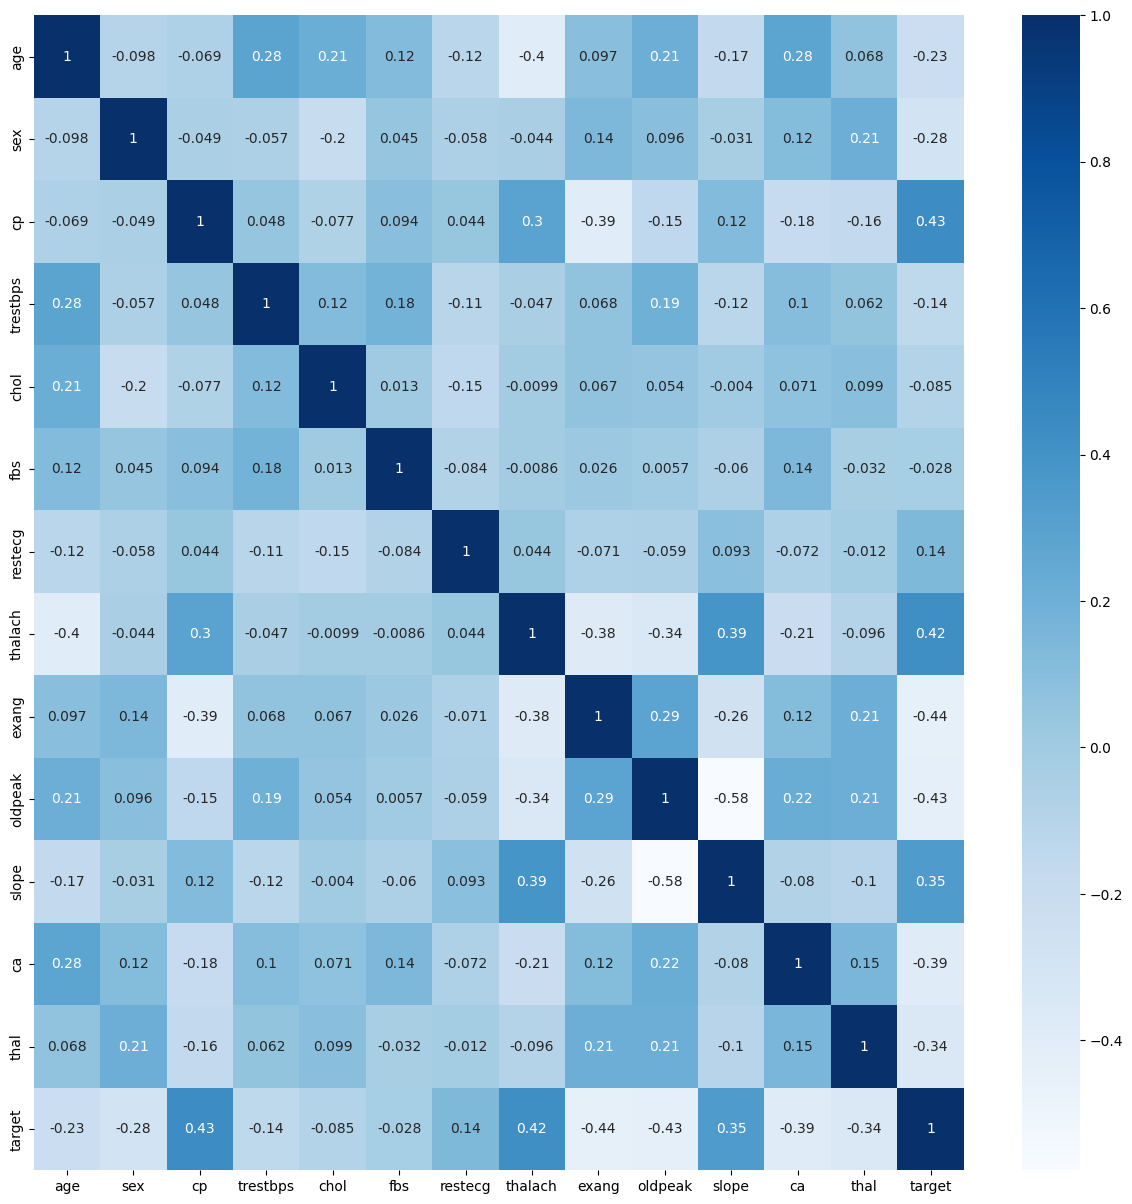

In [91]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

### Analysing the 'Age' feature

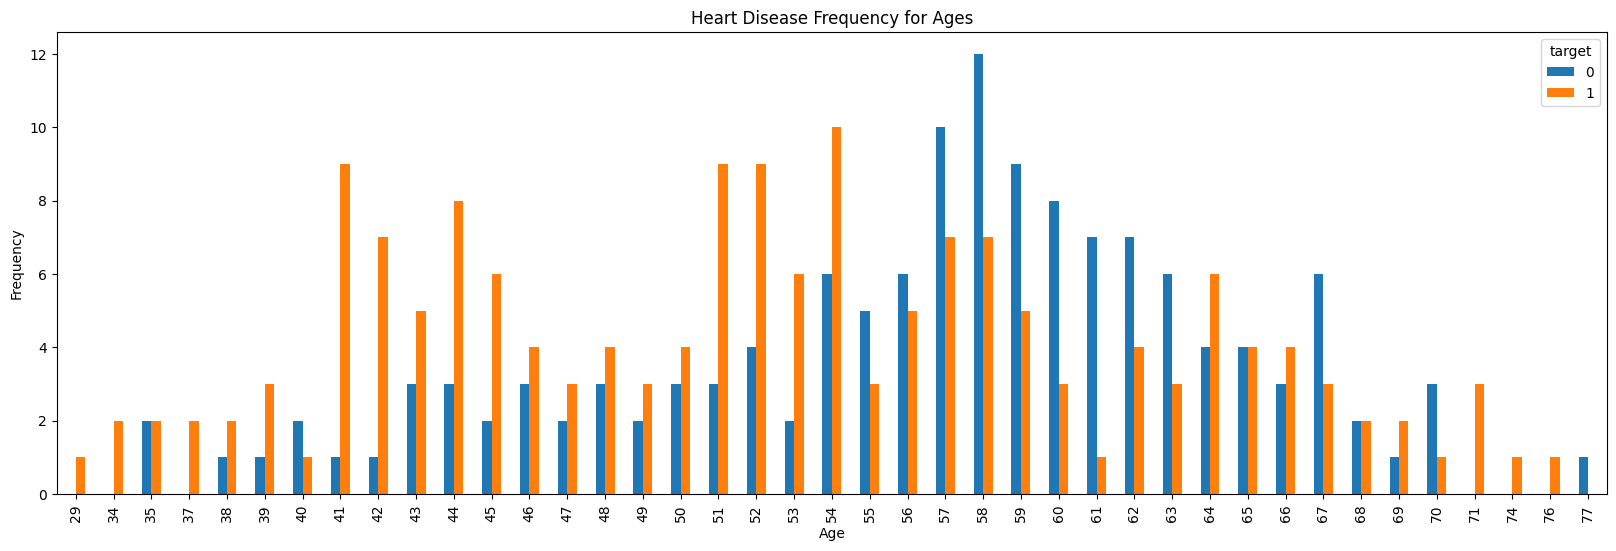

In [92]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### Analysing the 'Sex' feature

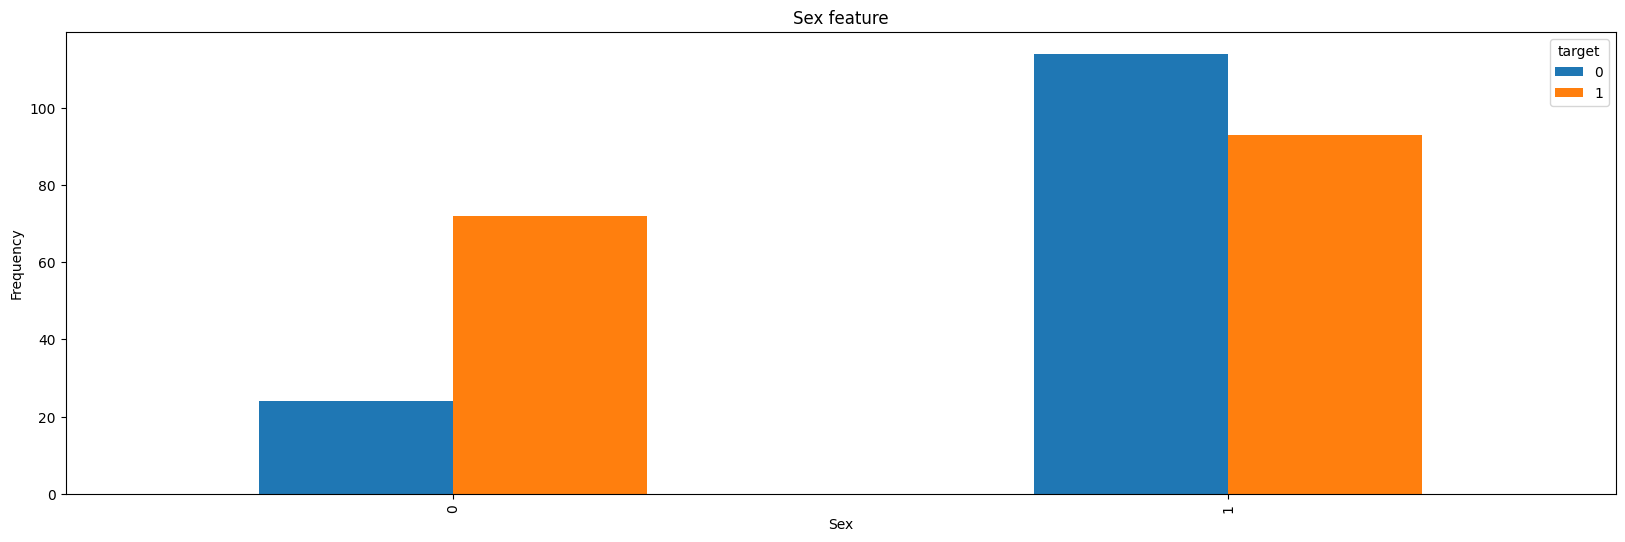

In [93]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Sex feature')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

### We notice, that females are more likely to have heart problems than males

## Analysing the 'Chest Pain Type' feature

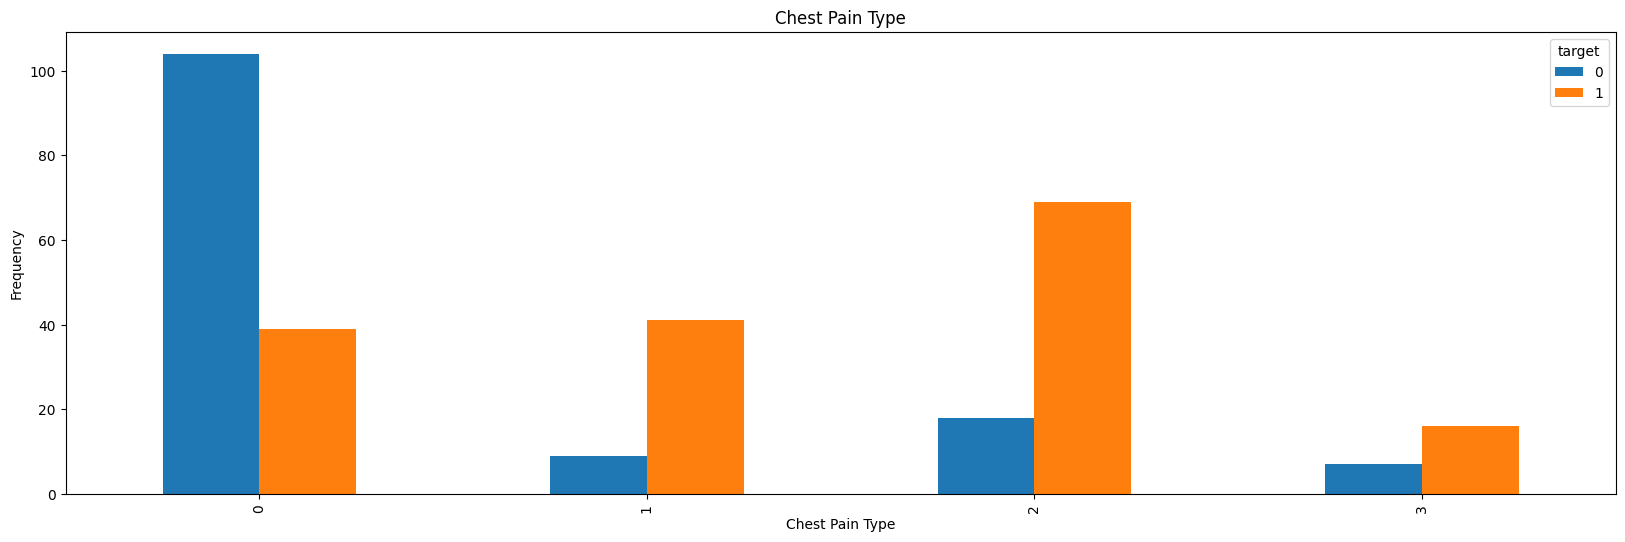

In [94]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

## 4. Data Splitting

In [95]:
X = df.drop(columns='target',axis=1)
Y = df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

## 5. Model Training

### 5.1 Logistic Regression

In [134]:
with mlflow.start_run(run_name="Logistic Regression"):
# Instantiating model with model parameters
    model = LogisticRegression()
# Fitting training data to the model
    model.fit(X_train, Y_train)
# Running prediction on validation dataset
    preds = model.predict(X_test)
# Getting metrics on the validation dataset
    accuarcy = round(accuracy_score(preds,Y_test)*100,2)
    rmse = mean_squared_error(preds, Y_test)
    abs_error = mean_absolute_error(preds, Y_test)
    r2 = r2_score(preds, Y_test)
# Logging params and metrics to MLFlow
    mlflow.log_metric('accuarcy', accuarcy)
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)

### 5.2 Random Forest Classifier

In [131]:
with mlflow.start_run(run_name="Random Forest Classifier"):
# Instantiating model with model parameters
    model = RandomForestClassifier(random_state=10)
# Fitting training data to the model
    model.fit(X_train, Y_train)
# Running prediction on validation dataset
    preds = model.predict(X_test)
# Getting metrics on the validation dataset
    accuarcy = round(accuracy_score(preds,Y_test)*100,2)
    rmse = mean_squared_error(preds, Y_test)
    abs_error = mean_absolute_error(preds, Y_test)
    r2 = r2_score(preds, Y_test)
# Logging params and metrics to MLFlow
    mlflow.log_param('random_state', 10)
    mlflow.log_metric('accuarcy', accuarcy)
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)
    mlflow.sklearn.log_model(model,"model")

### 5.3 KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
with mlflow.start_run(run_name="KNN"):
# Instantiating model with model parameters
    model = KNeighborsClassifier(n_neighbors=7)
# Fitting training data to the model
    model.fit(X_train, Y_train)
# Running prediction on validation dataset
    preds = model.predict(X_test)
# Getting metrics on the validation dataset
    accuarcy = round(accuracy_score(preds,Y_test)*100,2)
    rmse = mean_squared_error(preds, Y_test)
    abs_error = mean_absolute_error(preds, Y_test)
    r2 = r2_score(preds, Y_test)
# Logging params and metrics to MLFlow
    mlflow.log_metric('accuarcy', accuarcy)
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)

### 5.4 SVM

In [136]:
from sklearn import svm

with mlflow.start_run(run_name="SVM"):
# Instantiating model with model parameters
    model = svm.SVC(kernel='linear')
# Fitting training data to the model
    model.fit(X_train, Y_train)
# Running prediction on validation dataset
    preds = model.predict(X_test)
# Getting metrics on the validation dataset
    accuarcy = round(accuracy_score(preds,Y_test)*100,2)
    rmse = mean_squared_error(preds, Y_test)
    abs_error = mean_absolute_error(preds, Y_test)
    r2 = r2_score(preds, Y_test)
# Logging params and metrics to MLFlow
    mlflow.log_metric('accuarcy', accuarcy)
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)

### 5.5 Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

with mlflow.start_run(run_name=" Naive Bayes"):
# Instantiating model with model parameters
    model = GaussianNB()
# Fitting training data to the model
    model.fit(X_train, Y_train)
# Running prediction on validation dataset
    preds = model.predict(X_test)
# Getting metrics on the validation dataset
    accuarcy = round(accuracy_score(preds,Y_test)*100,2)
    rmse = mean_squared_error(preds, Y_test)
    abs_error = mean_absolute_error(preds, Y_test)
    r2 = r2_score(preds, Y_test)
# Logging params and metrics to MLFlow
    mlflow.log_metric('accuarcy', accuarcy)
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)

# 6. MLflow Model Registry

In [133]:
#Load all the run_ids
run_id=mlflow.search_runs()
#sort run_ids By metric accuarcy
run_id.sort_values(['metrics.accuarcy'],ascending=False,inplace=True)
#save the fisrt run_id which refer to the run that have the highest score
run_id_best = run_id.head(1)["run_id"].values[0]
model_best = run_id.head(1)["tags.mlflow.runName"].values[-1]

print(f"Optimal Model is : {model_best} with run_id : {run_id_best}")

Optimal Model is : Random Forest Classifier with run_id : f6c86a8692704bacb29c762548931c1c


### Register the model

In [104]:
#Create new model
from mlflow.tracking import MlflowClient
client = MlflowClient()
client.create_registered_model("Heart Disease Prediction")

<RegisteredModel: creation_timestamp=1674903547420, description='', last_updated_timestamp=1674903547420, latest_versions=[], name='Heart Disease Prediction', tags={}>

In [105]:
client = MlflowClient()
result = client.create_model_version(
    name="Heart Disease Prediction",
    source=f"mlruns/1/{run_id_best}/artifacts/model",
    run_id=run_id_best
)

2023/01/28 11:59:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Heart Disease Prediction, version 1


### Change model stage from none to Staging

In [106]:
client = MlflowClient()
client.transition_model_version_stage(
    name="Heart Disease Prediction",
    version=1,
    stage="Staging"
)

<ModelVersion: creation_timestamp=1674903552889, current_stage='Staging', description='', last_updated_timestamp=1674903559665, name='Heart Disease Prediction', run_id='7d103e90ecfa40cfbea72fc4d9ad77f7', run_link='', source='mlruns/1/7d103e90ecfa40cfbea72fc4d9ad77f7/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

### Change model stage Staging  to Production

In [107]:
client = MlflowClient()
client.transition_model_version_stage(
    name="Heart Disease Prediction",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1674903552889, current_stage='Production', description='', last_updated_timestamp=1674903567983, name='Heart Disease Prediction', run_id='7d103e90ecfa40cfbea72fc4d9ad77f7', run_link='', source='mlruns/1/7d103e90ecfa40cfbea72fc4d9ad77f7/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

# 7. Make Predictions

In [178]:
import mlflow.pyfunc

model = mlflow.pyfunc.load_model(
    model_uri= "mlflow-artifacts:/608726679219821676/7d103e90ecfa40cfbea72fc4d9ad77f7/artifacts/model"
)
x=[63,1,3,145,233,1,0,150,0,2.3,0,0,1]
d=pd.DataFrame(x).transpose()
print(f'Heart Disease Test : {model.predict(d)}')

Heart Disease Test : [1]


In [119]:
model = mlflow.pyfunc.load_model(
    model_uri= "mlflow-artifacts:/608726679219821676/7d103e90ecfa40cfbea72fc4d9ad77f7/artifacts/model"
)
x=[39,1,0,118,219,0,1,140,0,1.2,1,0,3]
d=pd.DataFrame(x).transpose()
print(f'Heart Disease Test : {model.predict(d)}')

Heart Disease Test : [0]
